In [5]:
import numpy
import matplotlib.pyplot as plt

[[ 8291    -1  1905    -3  1827     3   265     1]
 [  291     3  1801     1  -925    -1 -1167    -3]
 [  559    -1 -1215     1 -1197    -1  1853     1]
 [-1197    -1  1853     1  -977    -1   321     1]
 [  339    -1   317     1  -977    -1   321     1]
 [  559    -1 -1215     1   339    -1   317     1]
 [  291     3 -1271     1   611    -1   369    -3]
 [  611    -1   369    -3 -1245     3   265     1]]


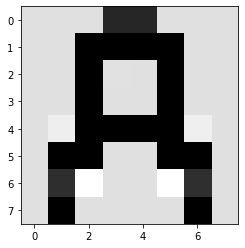

In [6]:
h8 = numpy.array(
    [
        [ 1,  1,  1,  1,  1,  1,  1,  1,],
        [ 1,  1,  1,  1, -1, -1, -1, -1,],
        [ 1,  1, -1, -1, -1, -1,  1,  1,],
        [ 1,  1, -1, -1,  1,  1, -1, -1,],
        [ 1, -1, -1,  1,  1, -1, -1,  1,],
        [ 1, -1, -1,  1, -1,  1,  1, -1,],
        [ 1, -1,  1, -1, -1,  1, -1,  1,],
        [ 1, -1,  1, -1,  1, -1,  1, -1,],
    ]
) / (2 * numpy.sqrt(2))

image = numpy.array([
    [192, 192, 192,  33,  33, 192, 192, 192,],
    [192, 192,   0,   0,   0,   0, 192, 192,],
    [192, 192,   0, 193, 192,   0, 192, 192,],
    [192, 192,   0, 192, 192,   0, 192, 192,],
    [192, 204,   0,   0,   0,   0, 205, 192,],
    [192,   0,   0, 192, 192,   0,   0, 192,],
    [192,  40, 219, 192, 192, 219,  41, 192,],
    [192,   0, 192, 192, 192, 192,   0, 192,],
])

JH = numpy.around(h8.dot(image).dot(h8) * 8).astype(int)

print(JH)
plt.imshow(image, cmap='gray')
plt.show()

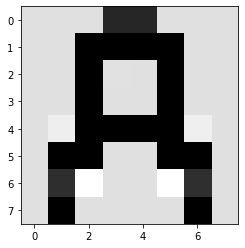

In [7]:
table = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 1, 1],
    [0, 1, 1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
]

def case(x : int, y : int) -> numpy.ndarray:
    x_array = numpy.array([table[x] for _ in range(8)]).T
    y_array = numpy.array([table[y] for _ in range(8)])
    return numpy.abs(numpy.abs(x_array - y_array) - 1)


image_tout = numpy.zeros((8, 8))

for k in range(8):
    for i in range(8):
        image_tout += case(k, i) * JH[k][i] / 32

image_tout = (numpy.around(image_tout) - numpy.min(image_tout)).astype(int)

plt.imshow(image_tout, cmap='gray')
plt.imshow(image_tout, cmap='gray')
plt.show()


In [8]:
def case(x : int, y : int) -> numpy.ndarray:
    table = [
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 1, 0, 0, 1],
        [0, 1, 0, 1, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
    ]
    x_array = numpy.array([table[x] for _ in range(8)]).T
    y_array = numpy.array([table[y] for _ in range(8)])
    grille = x_array + y_array
    grille[grille == 1] = -1
    grille[grille == 0] =  1
    grille[grille == 2] =  1
    return grille


In [9]:
def image_state(n : int) -> numpy.ndarray:
    image_partiel = numpy.zeros((8, 8))
    JH_copy = numpy.moveaxis(numpy.abs(JH.copy()), 0, 1)
    replace_min = numpy.min(JH_copy) - 1

    for _ in range(n):
        index = numpy.where(JH_copy == numpy.max(JH_copy))
        y, x = index[0][0], index[1][0]
        image_partiel += case(x, y) * JH[x][y]
        JH_copy[y][x] = replace_min

    return numpy.around(image_partiel / 64)


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


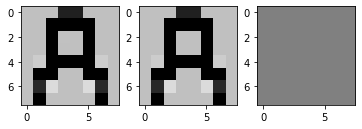

In [25]:
image_partiel = image_state(32)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap = "gray", vmin = 0, vmax = 255)
plt.subplot(1, 3, 2)
plt.imshow(image_partiel, cmap = "gray", vmin = 0, vmax = 255)
plt.subplot(1, 3, 3)
plt.imshow(image - image_partiel, cmap = "gray", vmin = -255, vmax = 255)
print(image - image_partiel)
plt.show()

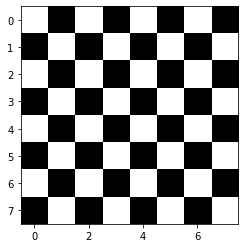

In [11]:
plt.imshow(case(7, 7), cmap='gray', vmax = 1, vmin = -1)

In [80]:
def root_mean_square_error(image):
    return numpy.sqrt((image ** 2).sum() / (image.shape[0] * image.shape[1]))

def signal_to_noise_ratio(default, image):
    return 10 * numpy.log10((default ** 2).sum() / ((image ** 2).sum() + 1))


61.9 8.1
25.2 15.9
17.2 19.3
4.1 31.8
0.2 56.0


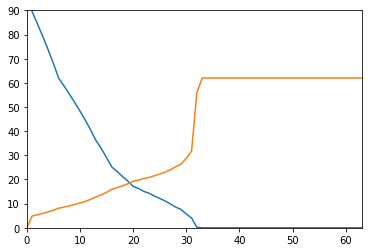

In [84]:
x = [k for k in range(64)]
RSME = [root_mean_square_error(image - image_state(k)) for k in x]
SNR = [signal_to_noise_ratio(image, image - image_state(k)) for k in x]

for i in (6, 16, 20, 31, 32):
    print(numpy.around(RSME[i], 1), numpy.around(SNR[i], 1))

plt.plot(x, RSME, SNR)
plt.axis([0, 63, 0, 90])
plt.show()
